In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples= 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant = 0)
#n_clusters_per_class = 2 per class 2 clusters the data points are overlapping

In [46]:
X.shape

(1000, 2)

In [47]:
y.shape

(1000,)

In [48]:
pd.DataFrame(X)[0]

0      1.216549
1     -2.575325
2      0.232286
3      0.890820
4     -1.843931
         ...   
995   -1.794312
996   -2.600518
997    1.279716
998   -1.029926
999   -1.122711
Name: 0, Length: 1000, dtype: float64

In [49]:
pd.DataFrame(X)[1]

0     -0.876997
1      1.093969
2     -1.235347
3     -1.098421
4     -2.019232
         ...   
995   -2.205993
996    0.763645
997   -0.891155
998    1.845930
999    0.552514
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

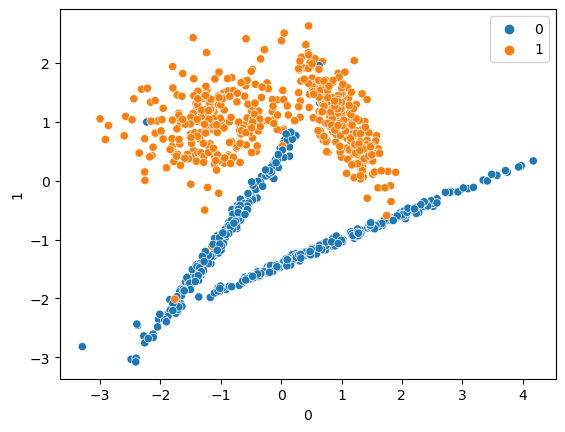

In [50]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)
#there are 20% of data are overlapping - mixed up data points, non linear dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30 , random_state = 1)

In [52]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [53]:
#C = regularization parameter no of parameters are sacrifies
#Degree = Degree of polynomial
#gamma = some type of scaling

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

In [55]:
classifier

SVC(kernel='linear')

In [56]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
classifier.coef_

array([[-0.14853828,  2.46821098]])

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       139
           1       0.91      0.96      0.93       161

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [61]:
print(confusion_matrix(y_test,y_pred))

[[123  16]
 [  7 154]]


In [62]:
from sklearn.model_selection import GridSearchCV
params = {'C':[1,2,3,4,5,6,7,8,9,10,20,50,100],
         'gamma':[0.2,1,0.4,0.001,0.003],
         'kernel':['linear']}

In [63]:
params

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100],
 'gamma': [0.2, 1, 0.4, 0.001, 0.003],
 'kernel': ['linear']}

In [64]:
grid = GridSearchCV(classifier, param_grid = params, cv=5, verbose = 3)
#verbose = intermediate result of fitting

In [65]:
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [66]:
grid.fit(X_train, y_train )

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.936 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.936 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.4, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [67]:
grid.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'linear'}

In [68]:
grid.best_score_

0.9485714285714286